## *PyTorch para Deep Learning*

O código abaixo é baseado no curso/livro on-line "Zero to Mastery Learn PyTorch for Deep Learning", disponível em <https://www.learnpytorch.io/>

## 01. PyTorch Workflow Fundamentals

In [21]:
# dicionário para guardar o processo de trabalho para a criação de um modelo de ML, 
# usado como uma referência para o que será feito ao longo desse processo

what_we_are_covering = { 1: "data (prepare and load)",
             2: "build model",
             3: "fitting the model to data (training)",
             4: "making predictions and evaluating a model (inference)",
             5: "saving and loading a model",
             6: "putting it all together"          
}

In [22]:
# importação de torch, torch.nn e matplotlib
# segundo o livro: "nn stands for neural network and this package contains the building blocks for creating neural networks in PyTorch"

import torch
from torch import nn
import matplotlib.pyplot as plt
import torch.version

# Para checar a versão do Pytorch
torch.__version__

'2.5.1+cu124'

*1. Data (preparing and loading)*

In [23]:
# segundo o livro/curso:

# "Machine learning is a game of two parts:
# Turn your data, whatever it is, into numbers (a representation).
# Pick or build a model to learn the representation as best as possible."

# diante disso, cria-se dados simples para a partir deles montar um modelo de *regressão linear*
# ou seja, eu tenho os dados e vou fazer com que os PARÂMETROS (não os dados/entrada, pois isso é impossível)
# do modelo sejam alterados para melhor representar o padrão presente ali

# crio parâmetros conhecidos - weight * x + bias (ou a * x + b)
weight = 0.7
bias = 0.3

# crio os dados para a simulação de uma conjunto de dados
start = 0
end = 1
step = 0.02 # ou seja, o meu conjunto de dados tem 50 números
X = torch.arange(start, end, step).unsqueeze(dim=1) # X representa a entrada (50 números)/características dos dados/features
y = weight * X + bias # y representa a saída original que eu vou tentar prever, é o rótulo/label que mostra qual é o resultado dos dados de entrada

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [24]:
# divide o conjunto de dados em treino e teste
train_split = int(0.8 * len(X)) # 80% dos dados serão usados para treino e os outros 20%, para teste
print(train_split) # teste pessoal para ver o valor de train_split
X_train, y_train =  X[:train_split], y[:train_split] # X_train e y_trai recebem os dados que vão do início dos dados até o limite de train_split
X_test, y_test = X[train_split:], y[train_split:] # X_test e y_test recebem os dados que vão de train_split até o final

len(X_train), len(y_train), len(X_test), len(y_test)

40


(40, 40, 10, 10)

In [25]:
# função para visualizar os dados e eventualmente plotar as predições

def plot_predicitions (train_data = X_train, train_labels = y_train, 
                       test_data = X_test, test_labels = y_test, predictions = None):
    
    # Plota os dados de treino, teste e compara a predição feita com o esperado

    plt.figure(figsize=(10, 7))

    # plota os dados de treino em azul
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # plota os dados de treino em verde
    plt.scatter(test_data, test_labels, c="g", s=4, label= "Testing data")

    if predictions is not None:
        # plota as predições feitas para os nos dados de teste em vermelho
        plt.scatter(test_data, predictions, c="r", s=4, label="Predicitions")

    # mostra a legenda
    plt.legend(prop={"size": 14})

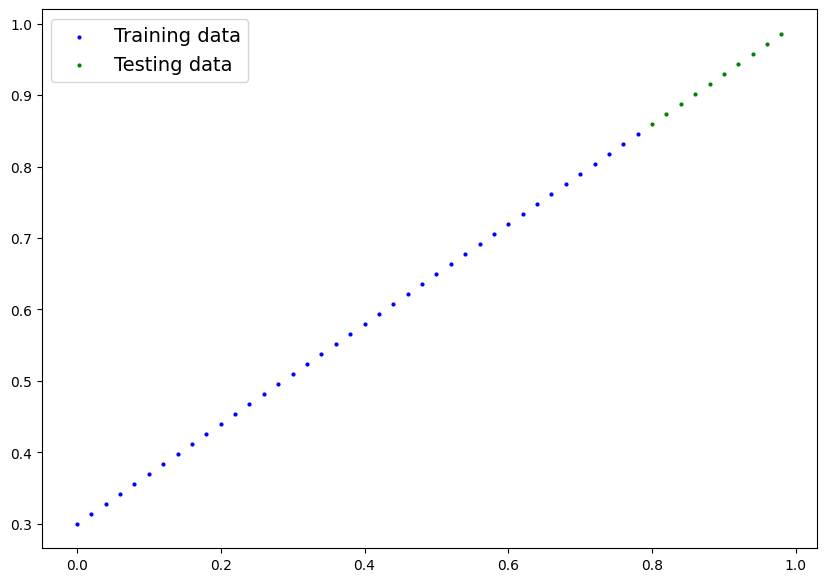

In [26]:
plot_predicitions()

*2. Build model*

In [32]:
# crio uma model class para realizar a Regressão Linear usando apenas PyTorch

class LinearRegressionModel(nn.Module): # "<- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)"
    def __init__ (self):
        super().__init__()

        # tanto para sel.weight como self.bias, eu começo com pesos aleatórios, que serão ajustados a medida que o modelo aprende
        # requires_grad possibilita que o modelo seja atualizado (automaticamente) por gradiente descendente

        # weight nesse caso se refere as conexões entre neurônios, que são ajustadas a medida em que o modelo aprende (como os coeficientes de uma equação, ex.: a (weight) * X + b)
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True) # o 1 aqui se refere a quantas posições de array eu terei no tensor

        # bias nesse caso se refere a uma camada extra de flexibilidade para o *resultado final* do modelo (é como a constante em uma equação, ex.: a * x + B (bias))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # foward define como será a computação no modelo
    def foward (self, x: torch.Tensor) -> torch.Tensor: # x é o dado de input (ex.: features de treino/teste)
        return self.weights * x + self.bias # fórmula de regressão linear (eq. de primeiro grau, y (label) = a (weight) * x (input) + b (bias))

*PyTorch - elementos essenciais*

Módulos essenciais do PyTorch, usados para a criação de redes neurais. As imagens foram tiradas de <https://www.learnpytorch.io/01_pytorch_workflow/>

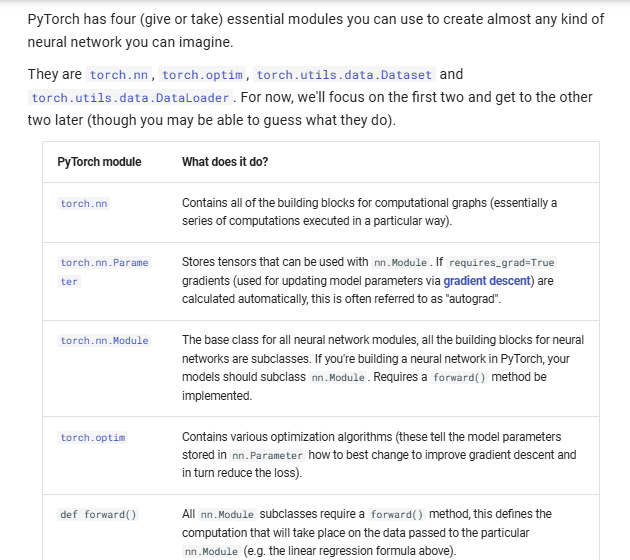

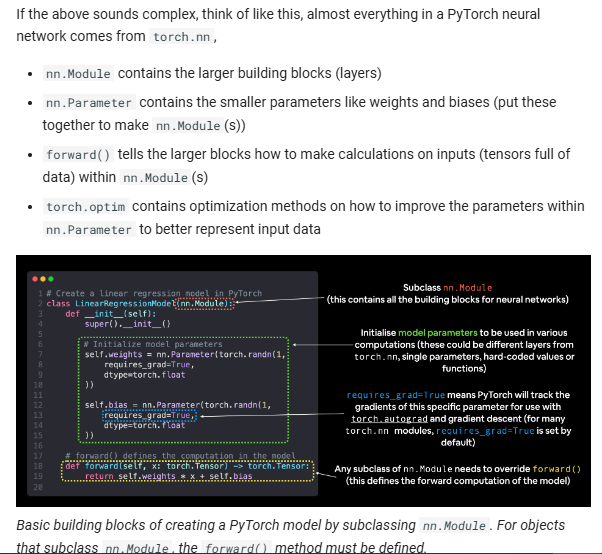

In [33]:
# crio uma instância do modelo com a classe que fiz e checo os parâmetros por meio de .parameters()

# configuro a seed manualmente, pois em nn.parameter ela é inicializada aleatoriamente
torch.manual_seed(42) # é como se a seed estabelecesse o grau de aleatoriedade -> mudar a seed altera os valores do tensor

# crio uma instância inicial do modelo (é uma subclasse de nn.Module que contém nn.Parameter)
model_0 = LinearRegressionModel() # classe que eu criei

# confiro os nn.Parameter(s) que estão dentro da subclasse de nn.Module que eu criei
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
# vejo o estado do modelo (ou seja, o que ele contém/seus parâmetros)
model_0.state_dict()

# os valores de weights e bias estão assim porque foram inicializados como valores aleatórios (torch.random())
# por conta disso, o modelo inicialmente não conseguirá prever bem os resultados

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [35]:
# faço predições com o modelo
with torch.inference_mode():
    y_preds = model_0 (X_test)

NotImplementedError: Module [LinearRegressionModel] is missing the required "forward" function